In [7]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler

In [8]:
df=pd.read_csv(r"C:\Users\Sudarshan\Documents\Usefl\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
x=df[['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

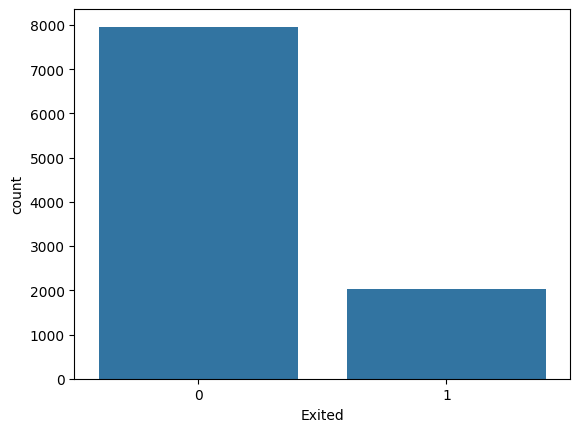

In [11]:
sns.countplot(x=y)

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\sudarshan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [13]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
ros=RandomOverSampler()

In [17]:
x,y=ros.fit_resample(x,y)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [20]:
x

array([[-0.29842862,  0.08499379, -1.02731343, ...,  0.65310767,
         1.08621001,  0.01753663],
       [-0.41081175, -0.00989658, -1.3719513 , ..., -1.53114111,
         1.08621001,  0.21170225],
       [-1.4937764 ,  0.08499379,  1.0405138 , ...,  0.65310767,
        -0.92063229,  0.23579564],
       ...,
       [ 1.57121789,  1.79302038, -0.68267556, ...,  0.65310767,
        -0.92063229, -1.05574985],
       [ 0.39630342,  0.27477452,  1.38515167, ..., -1.53114111,
        -0.92063229,  0.04690891],
       [-0.34951186,  0.84411672, -0.33803769, ...,  0.65310767,
        -0.92063229,  0.46536822]])

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),activation='relu',max_iter=100)

In [25]:
ann.fit(x_train,y_train)

c:\users\sudarshan\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)

In [26]:
y_pred=ann.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [28]:
accuracy_score(y_test,y_pred)

0.8700564971751412

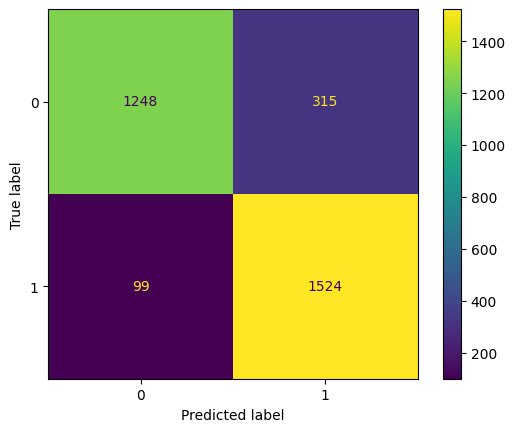

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1563
           1       0.83      0.94      0.88      1623

    accuracy                           0.87      3186
   macro avg       0.88      0.87      0.87      3186
weighted avg       0.88      0.87      0.87      3186



In [31]:
y_test.value_counts()

Exited
1    1623
0    1563
Name: count, dtype: int64